In [1]:
import healpy as hp 
import sys
import os
from tqdm import tqdm
import numpy as np
sys.path.append('../')
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2
from taunet.ncm import NoiseModel
from taunet.simulation import CMBspectra

TauNet: Running on perlmutter


In [3]:
ncm_sroll = NoiseModel(method='sroll')
ncm_ffp8 = NoiseModel(method='ffp8')

In [4]:
ncm_sroll.cholesky_dict

{}

In [5]:
ncm_sroll.cholesky_dict.keys()

dict_keys([])

In [9]:
for i in tqdm(range(240000,270000),desc='Noise'):
    ncm_sroll.noisemap(100,idx=i,unit='K',order='nested')

Noise:   0%|          | 0/30000 [00:00<?, ?it/s]Noise: 100%|██████████| 30000/30000 [01:35<00:00, 313.29it/s]


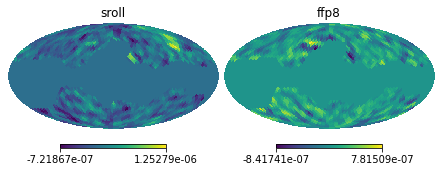

In [6]:
band = 143
idx = 3
hp.mollview(ncm_sroll.noisemap(band,unit='K',idx=idx,order='nested')[1], title='sroll',sub=(1,2,1),nest=True)
hp.mollview(ncm_ffp8.noisemap(band,unit='K',idx=idx,order='nested')[1], title='ffp8',sub=(1,2,2),nest=True)

In [5]:
cmb = CMBspectra()

In [6]:
def plot(f1,f2):
    plt.loglog(cmb.EE)
    plt.loglog(hp.alm2cl(ncm_ffp8.Emode(f1,0),ncm_ffp8.Emode(f2,0)),label=f'FFP8')
    plt.loglog(hp.alm2cl(ncm_roger.Emode(f1,0),ncm_roger.Emode(f2,0)),label='Roger')
    plt.title(f'{f1}x{f2}',fontsize=20)
    plt.legend()

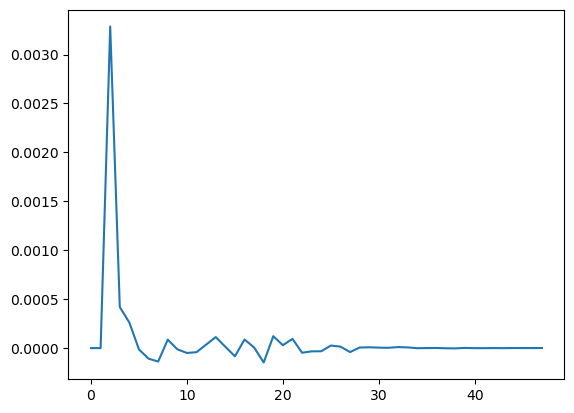

In [17]:
plt.plot(hp.alm2cl(ncm_ffp8.Emode(100,4),ncm_ffp8.Emode(143,4)))

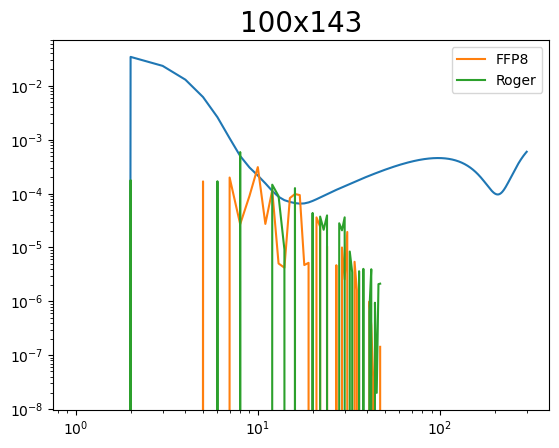

In [7]:
plot(100,143)

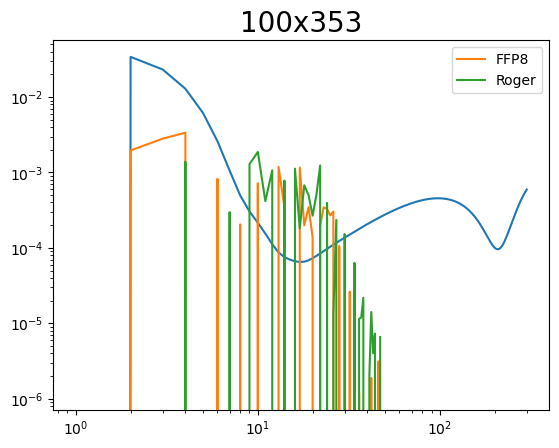

In [8]:
plot(100,353)

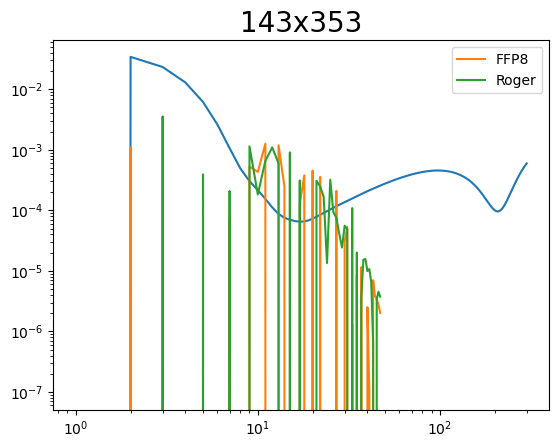

In [9]:
plot(143,353)

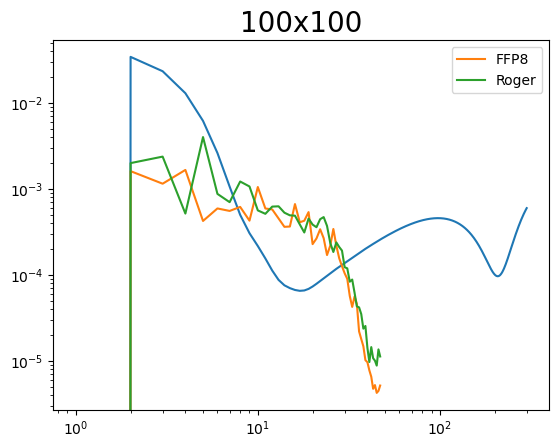

In [10]:
plot(100,100)